In [1]:
import sys
import os

In [2]:
from importer import *
from utils import *

In [3]:
# for plots

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
CLIPS_ROOT = raw_clip_data
SAVE_ROOT = os.path.join(save_clip_data, 'mask_pose')

In [5]:
from eventmap import *

mappingtool = MappingTool()

Show all events:

In [6]:
events = [event_names[i] for i in event_ids]
events

['meal time',
 'meeting',
 'coffee break',
 'nap',
 'cooking',
 'working',
 'tending to plants']

## Get

select an event

In [7]:
event = events[2]

Initialize clip management

In [8]:
# file management
mm = MapManagement()

# all of the clips
clips = mm.change_event(event)

Should change event afterwards!
Using Event coffee break
Available clips
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']


for each clip, save an image of the pose and event maps

In [22]:
clip = clips[13]

In [23]:
all_files = mm.get_sorted_npz_files(clip)

print(f'{clip}: ', len(all_files))

# initialize averages
pose_averages = {}
object_averages = {}
points = np.empty((3, 1))
points[:] = np.nan
H = mappingtool.single_histogram(points)
for name, value in eventmap_pose_dict.items():
    pose_averages[name] = H.copy()
for name, value in eventmap_object_dict.items():
    object_averages[name] = H.copy()


for file in all_files:

    file_path = os.path.join(mm.get_clip_directory(clip), file)

    # get poses and masks
    poses, objects = mm.get_poses_objects_from_npz(file_path)
    
    for name, value in eventmap_pose_dict.items():
        pose_averages[name] += poses[name]
    
    for name, value in eventmap_object_dict.items():
        object_averages[name] += objects[name]
    

13:  701


In [24]:
colormap = 'plasma'
X, Y = np.meshgrid(mappingtool.xedges, mappingtool.yedges)

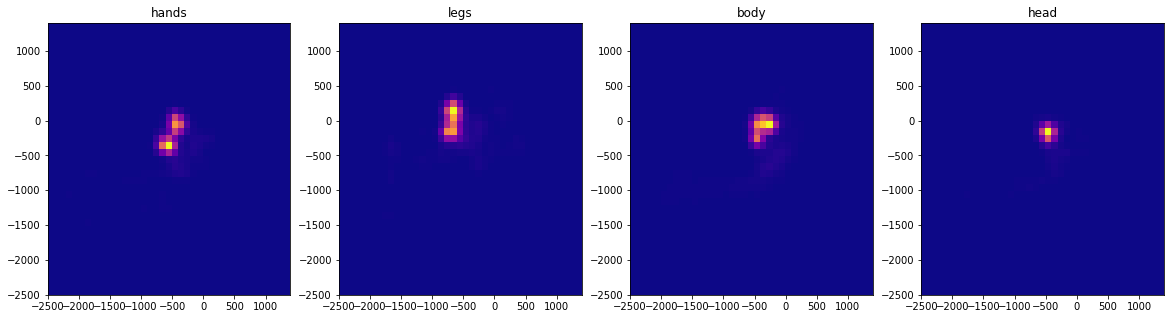

In [25]:
# figure for pose
fig, axs = plt.subplots(1, len(eventmap_pose_dict), 
                        figsize=(20, 5), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
axs_index = 0

for name, pose_H in pose_averages.items():
    pose_H = mappingtool.normalize(pose_H)
    pose_H = np.rot90(pose_H)
    axs[axs_index].pcolormesh(X, Y, pose_H, cmap=colormap, vmin=0.0, vmax=1.0)
    axs[axs_index].set_title(name)
    axs_index += 1

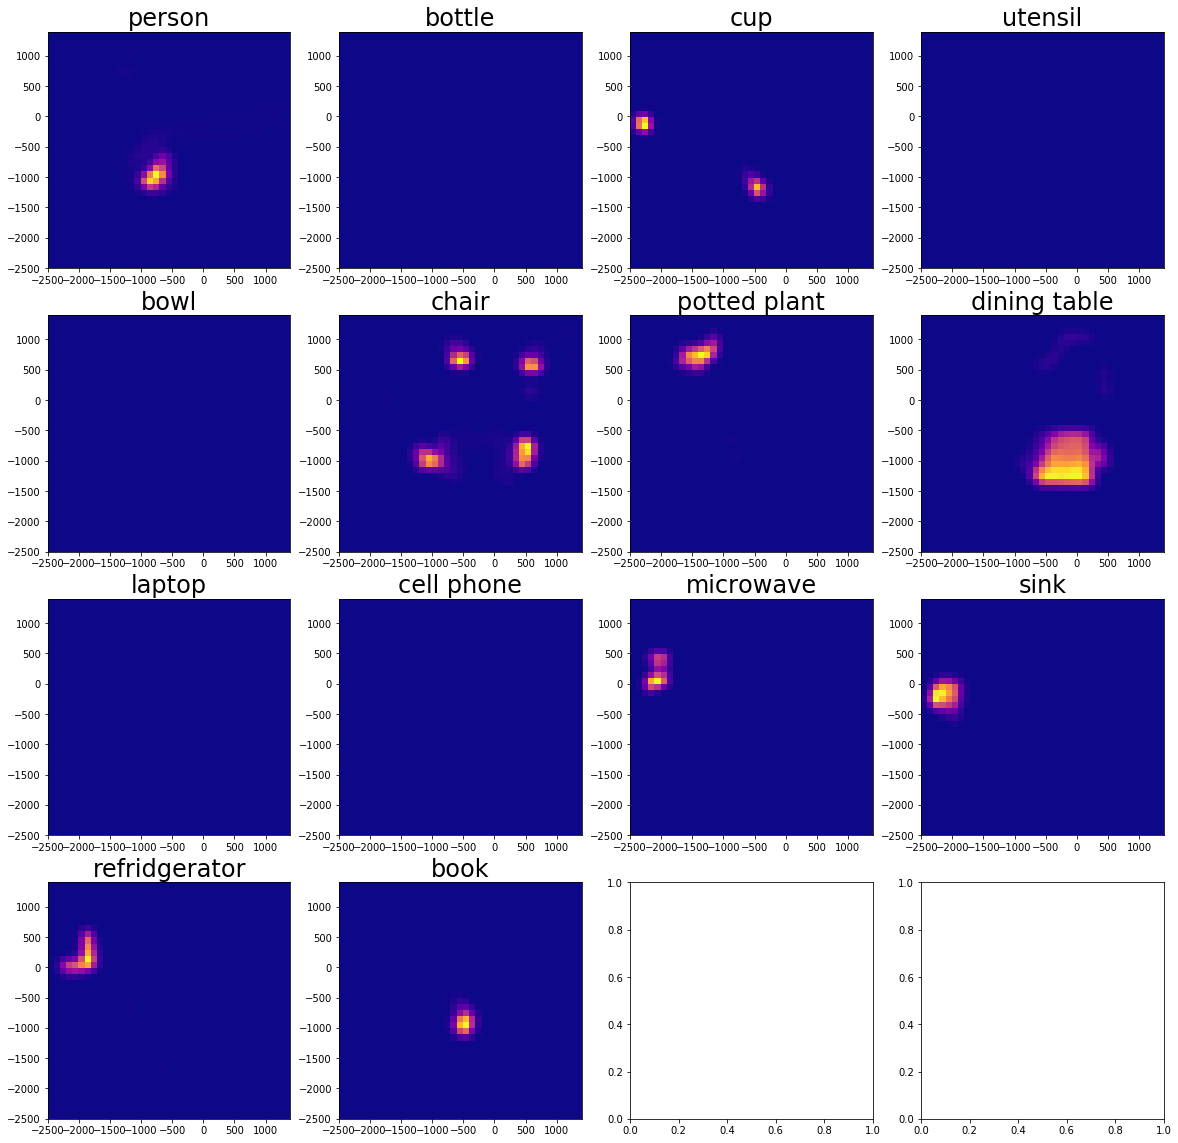

In [33]:
# figure for objects
rows = 3
fig, axs = plt.subplots(rows+1, len(eventmap_object_dict)//rows, 
                        figsize=(20, 20), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
axs_index = 0

for name, mask_H in object_averages.items():
    mask_H = mappingtool.normalize(mask_H)
    mask_H = np.rot90(mask_H, 3)
    axs[axs_index].pcolormesh(X, Y, mask_H, cmap=colormap, vmin=0.0, vmax=1.0)
    axs[axs_index].set_title(name, fontsize=24)
    axs_index += 1 
#plt.savefig('coffee_break_13_objects.png')

<Figure size 432x288 with 0 Axes>